# **Project Title:   Evaluating the Performance of Different Machine Learning Models for Breast Cancer Diagnosis**



## **Import Libraries**
Load the required libraries for data manipulation, preprocessing, visualization and modeling.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import accuracy_score
from tensorflow.keras.layers import Input
from tensorflow.keras.optimizers import Adam as adam
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.callbacks import EarlyStopping

### **Load and Explore the Dataset**
We will use the Breast Cancer Dataset (UCI Machine Learning Repository).

**Dataset Overview**

The dataset contains features computed from digitized images of fine needle aspirate (FNA) tests on breast masses.

**Key Features:**
Attributes like clump thickness, uniformity of cell size/shape, mitoses, etc.

**Dataset size:** 699 samples, with some missing values in the attribute "Bare Nuclei."

**Columns:**
Sample code number (ID, not useful)

Clump Thickness, Uniformity of Cell Size, ..., Bland Chromatin, etc. (features)

**Target Variable:**
Class (2 = benign, 4 = malignant).

In [2]:
def load_and_preprocess_data(url):
    """
    Function to load and Displays the first few rows, data types, missing values, and summary statistics.

    Parameters:
        url (str): URL of the dataset.

    Returns:
        pd.DataFrame: Loaded dataset as a pandas DataFrame.
    """
    # Column names for the dataset
    column_names = [
        'ID', 'Clump_Thickness', 'Uniformity_Cell_Size', 'Uniformity_Cell_Shape',
        'Marginal_Adhesion', 'Single_Epithelial_Cell_Size', 'Bare_Nuclei',
        'Bland_Chromatin', 'Normal_Nucleoli', 'Mitoses', 'Class'
    ]

    # Load the dataset
    data = pd.read_csv(url, names=column_names, header=None)
    display(data)

    # *** Replace '?' with NaN in the entire DataFrame before converting to numeric ***
    data = data.replace('?', np.nan)

    # Check for missing values and data types
    print("\nDataset Info:")
    print(data.info())

    return data

# URL of the dataset (UCI Breast Cancer Wisconsin Dataset)
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"

# Call the function
data = load_and_preprocess_data(url)

,ID,Clump_Thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   ID                           699 non-null    int64 
 1   Clump_Thickness              699 non-null    int64 
 2   Uniformity_Cell_Size         699 non-null    int64 
 3   Uniformity_Cell_Shape        699 non-null    int64 
 4   Marginal_Adhesion            699 non-null    int64 
 5   Single_Epithelial_Cell_Size  699 non-null    int64 
 6   Bare_Nuclei                  683 non-null    object
 7   Bland_Chromatin              699 non-null    int64 
 8   Normal_Nucleoli              699 non-null    int64 
 9   Mitoses                      699 non-null    int64 
 10  Class                        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB
None


In [3]:
# Statistics on DataFrame
# Mean, Median, Standard Deviation etc
def major_statistics():

    # mean and median:
    mean_value = data.mean(numeric_only=True)
    median_value = data.median(numeric_only=True)

    # standard deviation
    std_deviation = data.std(numeric_only=True)

    skewness = data.skew(numeric_only=True)
    kurtosis = data.kurt(numeric_only=True)

    print("\033[1mMean:\n\033[0m", mean_value)
    print("\n\033[1mMedian:\n\033[0m", median_value)
    print("\n\033[1mStandard Deviation:\n\033[0m", std_deviation)
    print("\n\033[1mSkewness:\n\033[0m", skewness)
    print("\n\033[1mKurtosis:\n\033[0m", kurtosis)
    return

In [4]:
major_statistics()

Mean:
 ID                             1.071704e+06
Clump_Thickness                4.417740e+00
Uniformity_Cell_Size           3.134478e+00
Uniformity_Cell_Shape          3.207439e+00
Marginal_Adhesion              2.806867e+00
Single_Epithelial_Cell_Size    3.216023e+00
Bland_Chromatin                3.437768e+00
Normal_Nucleoli                2.866953e+00
Mitoses                        1.589413e+00
Class                          2.689557e+00
dtype: float64

Median:
 ID                             1171710.0
Clump_Thickness                      4.0
Uniformity_Cell_Size                 1.0
Uniformity_Cell_Shape                1.0
Marginal_Adhesion                    1.0
Single_Epithelial_Cell_Size          2.0
Bland_Chromatin                      3.0
Normal_Nucleoli                      1.0
Mitoses                              1.0
Class                                2.0
dtype: float64

Standard Deviation:
 ID                             617095.729819
Clump_Thickness                     

### **Data Preprocessing**
Preprocessing ensures data is clean and ready for modeling. Steps include:
1. Dropping unnecessary columns (e.g., 'ID').
2. Handling missing values in the 'Bare_Nuclei' column using median imputation.
3. Encoding the target variable ('Class') as binary (0 = benign, 1 = malignant).
4. Scaling features to standardize input for ANN and improve model convergence.

#### Why Scaling?
ANNs are sensitive to feature magnitudes. Standardizing features (mean = 0, std = 1) ensures faster convergence and better performance.


In [5]:
def preprocess_data(data):
    """
    Preprocess the dataset.
    - Handles missing values in 'Bare_Nuclei'.
    - Converts 'Class' to binary format (2 -> 0, 4 -> 1).
    - Splits the data into training and testing sets.
    - Normalizes the features using StandardScaler.

    Args:
        data: Loaded dataset as a pandas DataFrame.

    Returns:
        X_train_scaled, X_test_scaled, y_train, y_test: Normalized feature data and target labels.
    """
    # Handle missing values in 'Bare_Nuclei' by converting to numeric and filling missing values with median
    # Convert '?' to NaN before applying pd.to_numeric
    data['Bare_Nuclei'] = data['Bare_Nuclei'].replace('?', np.nan) # Replace '?' with NaN
    data['Bare_Nuclei'] = pd.to_numeric(data['Bare_Nuclei'], errors='coerce')
    median_value = data['Bare_Nuclei'].median()
    data['Bare_Nuclei'] = data['Bare_Nuclei'].fillna(median_value)

    # Verify missing values are handled
    print("\nMissing values after handling:")
    print(data.isnull().sum())

    # Convert 'Class' to binary format
    data['Class'] = data['Class'].replace({2: 0, 4: 1})
    print("\nTarget Variable Encoding Completed.")

    # Split features and target variable
    X = data.drop(columns=['Class'])
    y = data['Class']

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )
    # Display shapes of training and testing data
    print("\nData split into training and test sets.")
    print(f"Training Data Shape: {X_train.shape}")
    print(f"Test Data Shape: {X_test.shape}")

    # Normalize the features using StandardScaler
    # This ensures all features have a mean of 0 and a standard deviation of 1,
    # which helps models (especially ANNs) converge faster and improve performance.
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Display a preview of the scaled data
    print("\nPreview of Scaled Features (Training Data):")
    print(pd.DataFrame(X_train_scaled).head())

    return X_train_scaled, X_test_scaled, y_train, y_test, X_train

# Call preprocess_data to create X_train, X_test, y_train, y_test
X_train_scaled, X_test_scaled, y_train, y_test , X_train = preprocess_data(data)



Missing values after handling:
ID                             0
Clump_Thickness                0
Uniformity_Cell_Size           0
Uniformity_Cell_Shape          0
Marginal_Adhesion              0
Single_Epithelial_Cell_Size    0
Bare_Nuclei                    0
Bland_Chromatin                0
Normal_Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

Target Variable Encoding Completed.

Data split into training and test sets.
Training Data Shape: (559, 10)
Test Data Shape: (140, 10)

Preview of Scaled Features (Training Data):
          0         1         2         3         4         5         6  \
0  0.394162  1.960783  2.210439  1.602175  2.471191  1.262160  0.405538   
1 -0.507730 -1.224460 -0.696179 -0.749404 -0.628426 -0.551587 -0.418810   
2  0.154327  0.191203 -0.696179 -0.749404 -0.628426 -0.551587 -0.418810   
3  0.146675 -0.516629 -0.696179 -0.749404 -0.628426 -0.551587 -0.693593   
4  0.215179  0.545119  2.210439  2.2

## **Display Preprocessing Summary**

In [6]:
# Display preprocessing summary
print("\nPreprocessing Summary")
print("----------------------")
print("Target variable encoded (4 → 1, 2 → 0).")
print("Data split into training and test sets.")
print("Data scaled using StandardScaler.")
print()
print(f"Training Data Shape: {X_train_scaled.shape}")
print(f"Test Data Shape: {X_test_scaled.shape}")
print(f"Training Target Shape: {y_train.shape}")
print(f"Test Target Shape: {y_test.shape}")
print("----------------------")
print("Class Distribution in Training Data:")
print(y_train.value_counts())
print()
print("Class Distribution in Test Data:")
print(y_test.value_counts())



Preprocessing Summary
----------------------
Target variable encoded (4 → 1, 2 → 0).
Data split into training and test sets.
Data scaled using StandardScaler.

Training Data Shape: (559, 10)
Test Data Shape: (140, 10)
Training Target Shape: (559,)
Test Target Shape: (140,)
----------------------
Class Distribution in Training Data:
Class
0    366
1    193
Name: count, dtype: int64

Class Distribution in Test Data:
Class
0    92
1    48
Name: count, dtype: int64


## **Visualize Class Distribution**
This step visualizes the class distribution (Benign vs Malignant) to ensure the dataset is balanced.


Class Distribution:
Class
0    458
1    241
Name: count, dtype: int64


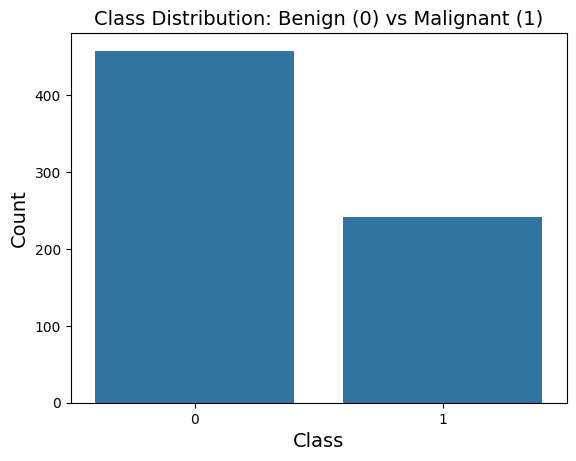

In [7]:
def visualize_class_distribution(data, target_column):
    """
    Visualize the class distribution for the target variable.
    """
    print("\nClass Distribution:")
    print(data[target_column].value_counts())

    # Plot class distribution
    sns.countplot(x=target_column, data=data)
    plt.title("Class Distribution: Benign (0) vs Malignant (1)" , fontsize=14)
    plt.xlabel("Class" , fontsize=14)
    plt.ylabel("Count" , fontsize=14)
    plt.show()
    return

# Call the function with the correct target column name 'Class'
visualize_class_distribution(data, 'Class')

# **Pie Plot**

In [8]:
import plotly.express as px

def create_pie_chart(data):
    """
    Creates and displays a pie chart showing the percentage of Benign and Malignant cases,
    with the legend moved inside the chart displaying counts and percentages.

    Args:
        data (pd.DataFrame): The input DataFrame containing the 'Class' column, where
                             '0' represents Benign and '1' represents Malignant cases.

    Returns:
        None. Displays the pie chart.
    """
    # Count occurrences of each class
    class_counts = data['Class'].value_counts().reset_index()
    class_counts.columns = ['Class', 'Count']

    # Calculate percentages
    total_count = class_counts['Count'].sum()
    class_counts['Percentage'] = (class_counts['Count'] / total_count) * 100

    # Create custom labels with counts and percentages for the legend
    class_counts['Label'] = class_counts.apply(
        lambda row: f"{'Benign' if row['Class'] == 0 else 'Malignant'}<br>({row['Count']} - {row['Percentage']:.1f}%)",
        axis=1
    )

    # Create a pie chart using Plotly Express
    fig = px.pie(
        class_counts,
        names='Label',  # Use custom labels for the pie slices
        values='Count',  # Use counts to determine the size of the slices
        title="Percentage of Benign and Malignant Cases",  # Chart title
        color_discrete_map={
            'Benign<br>(458 - 65.5%)': 'skyblue',
            'Malignant<br>(241 - 34.5%)': 'red'
        }  # Assign specific colors to the slices
    )

    # Adjust layout for better visual clarity and move the legend inside the chart
    fig.update_layout(
        margin=dict(t=50, l=25, r=25, b=25),  # Adjust margin for visual clarity
        legend=dict(
            x=0.5,  # Position legend closer to the pie chart (inside)
            y=0.5,   # Adjust vertical position of the legend (inside the chart)
            traceorder='normal',
            orientation='v',  # Vertical orientation
            font=dict(size=12),  # Adjust font size for readability
            bgcolor='rgba(255, 255, 255, 0.5)',  # Background color for better contrast
            borderwidth=1,  # Set border width for the legend
            xanchor='center',  # Align legend horizontally inside the chart
            yanchor='middle'   # Align legend vertically inside the chart
        )
    )

    # Display the chart
    fig.show()
    return

# Example Usage
if __name__ == "__main__":
    # Example data (replace with your actual DataFrame)
    example_data = pd.DataFrame({
        'Class': [0] * 458 + [1] * 241  # 458 Benign cases and 241 Malignant cases
    })

    # Call the function to create and display the pie chart
    create_pie_chart(example_data)


# **Train and Evaluate Models**

### **Build and Train Artificial Neural Network (ANN)**

The function builds and trains an Artificial Neural Network using TensorFlow/Keras.
The ANN was trained using:
- Activation functions: ReLU for hidden layers, sigmoid for the output layer.
- Dropout layers to prevent overfitting.
- Early stopping to halt training when validation loss stops improving

In [9]:
def train_ann(X_train, y_train, X_test, y_test):
    """
    Train an Artificial Neural Network and evaluate its accuracy.

    Args:
        X_train, y_train: Training data and labels.
        X_test, y_test: Testing data and labels.

    Returns:
        ann_model: Trained ANN model.
        ann_predictions: Predictions on test data.
        ann_accuracy: Accuracy of the model.

    """
    # ANN Architecture
    ann_model = Sequential([
        Input(shape=(X_train.shape[1],)),  # Explicit Input layer using X_train shape
        Dense(64, activation='relu'),  # first hidden layer
        Dropout(0.3),  # Dropout layer to prevent overfitting
        Dense(32, activation='relu'),   # Second hidden layer
        Dense(1, activation='sigmoid')  # Output layer for binary classification
    ])

    # Compile the model
    learning_rate = 0.001
    ann_model.compile(optimizer=adam(learning_rate=learning_rate), loss='binary_crossentropy', metrics=['accuracy'])

    # Early stopping to prevent overfitting
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    # Train the model
    history = ann_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=32, callbacks=[early_stopping])

    # Evaluate the model
    loss, accuracy = ann_model.evaluate(X_test, y_test, verbose=0)
    print(f"\nANN Test Accuracy: {accuracy:.4f}")

    # Return the trained model along with the accuracy and history
    return ann_model, accuracy, history

# Call the function using the outputs of preprocess_data
ann_model, ann_accuracy, history = train_ann(X_train_scaled, y_train, X_test_scaled, y_test) # Get the trained model and history

# Get predictions and convert to binary
ann_preds = (ann_model.predict(X_test_scaled) > 0.5).astype(int) # Use the returned model

# Print classification report
print("Classification Report for ANN:")
print(classification_report(y_test, ann_preds, target_names=['Benign', 'Malignant']))

Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 131ms/step - accuracy: 0.7347 - loss: 0.6209 - val_accuracy: 0.9571 - val_loss: 0.3721
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9460 - loss: 0.3329 - val_accuracy: 0.9643 - val_loss: 0.1948
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9636 - loss: 0.1741 - val_accuracy: 0.9643 - val_loss: 0.1255
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9560 - loss: 0.1246 - val_accuracy: 0.9643 - val_loss: 0.1081
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9757 - loss: 0.0845 - val_accuracy: 0.9643 - val_loss: 0.1038
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9747 - loss: 0.0783 - val_accuracy: 0.9643 - val_loss: 0.1027
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9630 - loss: 0.1014 - val_accuracy: 0.9643 - val_loss: 0.1029
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9749 - loss: 0.0831 - val_accuracy: 0.9643 -

## **Training and Validation Performance Visualization**
### **ANN training and validation curve for accuracy**:
The plot_training_history function provides an intuitive way to visualize the performance of a neural network model during training. By plotting metrics such as accuracy or loss over epochs, it helps identify patterns like overfitting or underfitting. Here's how it works:

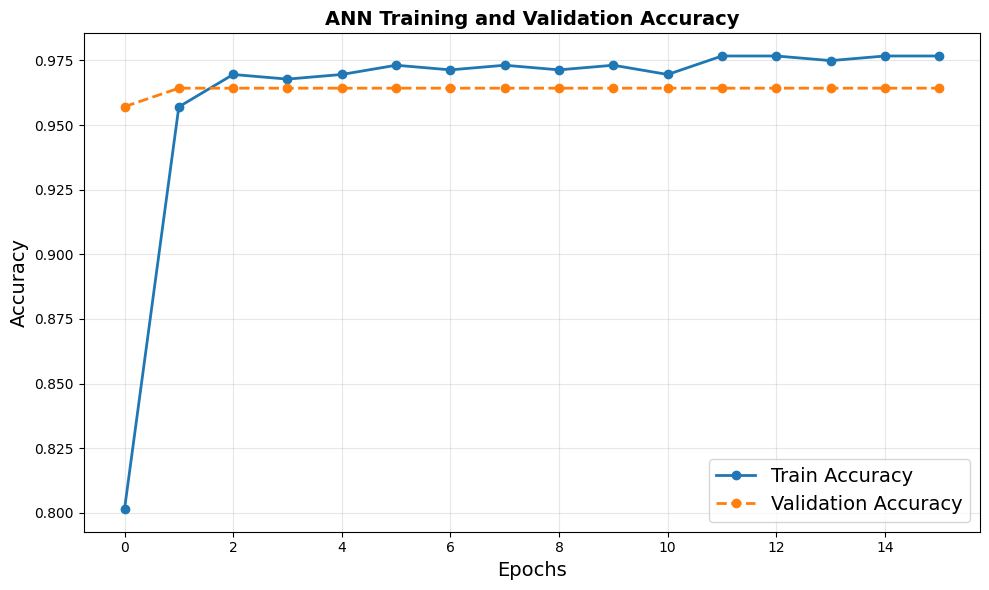

In [10]:
def plot_training_history(history, metric='accuracy', title='ANN Training and Validation Performance'):
    """
    Plot the training and validation performance metrics over epochs.

    Args:
        history: History object returned by the Keras model's fit() method.
        metric: The metric to plot (default is 'accuracy'). Can also plot 'loss' or other metrics if available.
        title: Title of the plot (default is 'ANN Training and Validation Performance').

    Returns:
        None. Displays the plot.
    """
    if metric not in history.history:
        raise ValueError(f"Metric '{metric}' not found in training history. Available metrics: {list(history.history.keys())}")

    plt.figure(figsize=(10, 6))

    # Plot training metric
    plt.plot(history.history[metric], label=f'Train {metric.capitalize()}', marker='o', linestyle='-', linewidth=2)

    # Plot validation metric
    val_metric = f'val_{metric}'
    if val_metric in history.history:
        plt.plot(history.history[val_metric], label=f'Validation {metric.capitalize()}', marker='o', linestyle='--', linewidth=2)

    # Add labels, title, legend, and grid
    plt.xlabel('Epochs', fontsize=14)
    plt.ylabel(metric.capitalize(), fontsize=14)
    plt.title(title, fontsize=14, fontweight='bold')
    plt.legend(loc='best', fontsize=14)
    plt.grid(alpha=0.3)

    # Show the plot
    plt.tight_layout()
    plt.show()

# Example Usage:
plot_training_history(history, metric='accuracy', title='ANN Training and Validation Accuracy')


"The graph depicts the training and validation accuracy of the ANN model over the training epochs. The training accuracy is shown as a solid line, while the validation accuracy is represented by a dashed line."

Training accuracy steadily increases, while validation accuracy closely follows, indicating good generalization. Convergence occurs around [X] epochs, with minimal gap suggesting strong performance and limited overfitting.

## **Train Decision Tree**
The Decision Tree classifier was trained with default settings to highlight its interpretability and speed.

In [11]:
def train_decision_tree(X_train, y_train, X_test, y_test):
    """
    Train a Decision Tree model with hyperparameter tuning and evaluate its accuracy.
    """
    # Hyperparameter grid for tuning
    param_grid = {
        'criterion': ['gini', 'entropy'],
        'max_depth': [None, 5, 10, 15],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
    }

    # Initialize the Decision Tree model
    dt = DecisionTreeClassifier(random_state=42)

    # Perform Grid Search for optimal parameters
    grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    # Get the best model
    best_dt = grid_search.best_estimator_

    # Make predictions on the test set
    dt_preds = best_dt.predict(X_test)
    dt_accuracy = accuracy_score(y_test, dt_preds)

    print(f"Best Decision Tree Accuracy: {dt_accuracy:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, dt_preds, target_names=['Malignant', 'Benign']))

    return best_dt, dt_accuracy , dt_preds

# Example usage
if __name__ == "__main__":
   best_dt, dt_accuracy, dt_predictions = train_decision_tree(X_train_scaled, y_train, X_test_scaled, y_test) # store the predictions here


Best Decision Tree Accuracy: 0.9214

Classification Report:
              precision    recall  f1-score   support

   Malignant       0.93      0.96      0.94        92
      Benign       0.91      0.85      0.88        48

    accuracy                           0.92       140
   macro avg       0.92      0.91      0.91       140
weighted avg       0.92      0.92      0.92       140



## **Train Random Forest**
The Random Forest used 100 estimators (trees) for robust classification.

In [12]:
def train_random_forest(X_train, y_train, X_test, y_test, criterion='entropy', n_estimators=100):
    """
    Train a Random Forest Classifier on the dataset.

    Args:
        X_train (array-like): Training data features.
        y_train (array-like): Training data labels.
        X_test (array-like): Testing data features.
        y_test (array-like): Testing data labels.
        criterion (str): Splitting criterion ('gini' or 'entropy'). Default is 'entropy'.
        n_estimators (int): Number of trees in the forest. Default is 100.

    Returns:
        rf_model: Trained Random Forest model.
        rf_predictions: Predictions on test data.
        rf_accuracy: Accuracy of the model.
    """
    # Validate criterion input
    if criterion not in ['gini', 'entropy']:
        raise ValueError("Invalid criterion. Choose 'gini' or 'entropy'.")

    # Initialize Random Forest model
    rf_model = RandomForestClassifier(criterion=criterion, n_estimators=n_estimators, random_state=42)

    # Train the model
    rf_model.fit(X_train, y_train)

    # Predict on test data
    rf_predictions = rf_model.predict(X_test)

    # Calculate accuracy
    rf_accuracy = accuracy_score(y_test, rf_predictions)

    return rf_model, rf_predictions, rf_accuracy

# Example usage:
rf_model, rf_predictions, rf_accuracy = train_random_forest(
    X_train_scaled, y_train, X_test_scaled, y_test, criterion='entropy', n_estimators=100
)
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")

# Print classification report for Random Forest
print("Classification Report for Random Forest:")
print(classification_report(y_test, rf_predictions, target_names=['Benign', 'Malignant']))


Random Forest Accuracy: 0.9571
Classification Report for Random Forest:
              precision    recall  f1-score   support

      Benign       0.98      0.96      0.97        92
   Malignant       0.92      0.96      0.94        48

    accuracy                           0.96       140
   macro avg       0.95      0.96      0.95       140
weighted avg       0.96      0.96      0.96       140



## **Confusion Matrices**

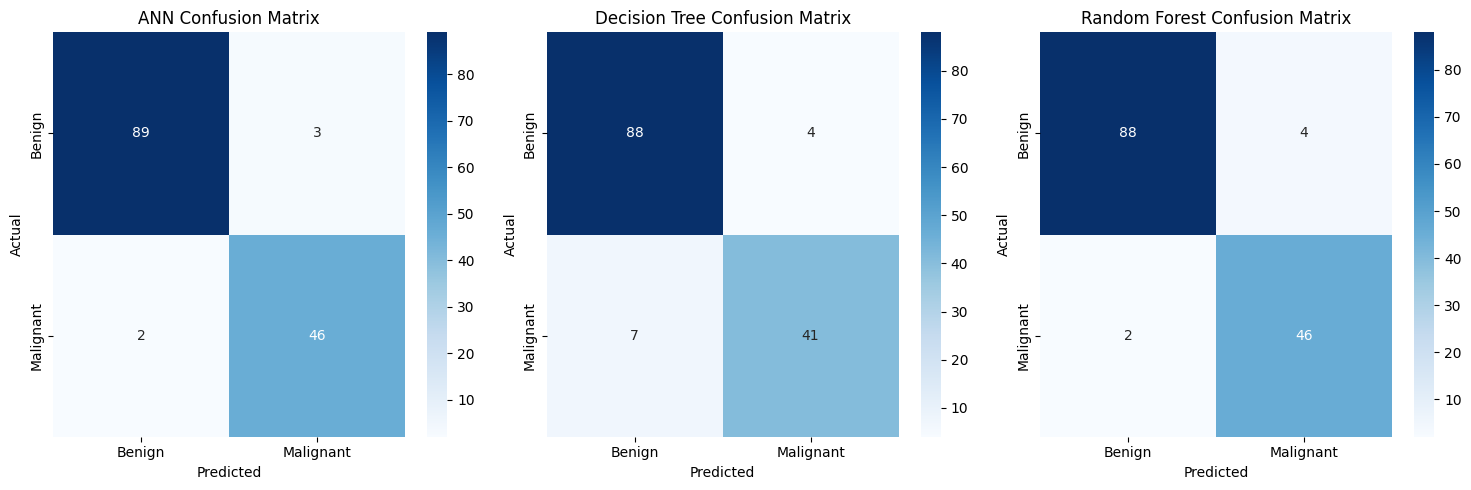

In [13]:
def plot_confusion_matrices(models, y_true, predictions):
    """
    Plots confusion matrices for multiple models in a single figure.
    Args:
        models (list): List of model names.
        y_true (array): True labels.
        predictions (list): List of predicted label arrays from different models.
    """
    plt.figure(figsize=(15, 5))
    for i, (model_name, preds) in enumerate(zip(models, predictions)):
        plt.subplot(1, len(models), i + 1)
        cm = confusion_matrix(y_true, preds)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
        plt.title(f"{model_name} Confusion Matrix")
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()

# Call for all models
plot_confusion_matrices(
    ["ANN", "Decision Tree", "Random Forest"],
    y_test,
    [ann_preds, dt_predictions, rf_predictions]
)


## **Correlation Matrix**

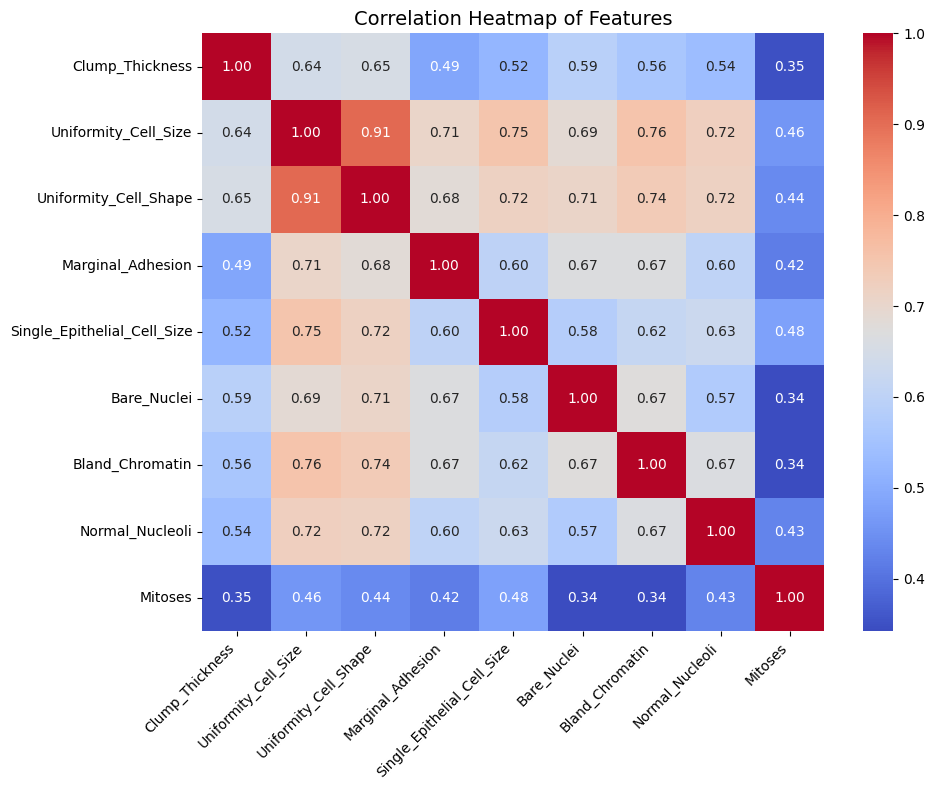

In [14]:
def plot_correlation_heatmap(data, exclude_columns=None, title="Correlation Heatmap of Features"):
    """
    Computes and plots the correlation heatmap for numerical features in the dataset.

    Args:
        data (pd.DataFrame): The dataset containing numerical features.
        exclude_columns (list, optional): Columns to exclude from the correlation matrix. Defaults to None.
        title (str, optional): Title for the heatmap. Defaults to "Correlation Heatmap of Features".

    Returns:
        None
    """
    if exclude_columns is None:
        exclude_columns = []

    # Dynamically compute correlation matrix, excluding specified columns
    correlation_matrix = data.drop(columns=exclude_columns, errors='ignore').corr()

    # Plot the heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(
        correlation_matrix,
        annot=True,
        fmt='.2f',
        cmap='coolwarm',
        cbar=True
    )
    plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotate x-axis labels for better visibility
    plt.yticks(fontsize=10)
    plt.title(title, fontsize=14)
    plt.tight_layout()  # Adjust layout to avoid clipping
    plt.show()
    return

# Call the function to plot the correlation heatmap
plot_correlation_heatmap(data, exclude_columns=['ID', 'Class'])

**Insights and Comparison**
- **Accuracy**: ANN performed slightly better than Random Forest and significantly better than Decision Tree.
- **Training Time**: ANN took longer to train due to its iterative weight updates, while Decision Tree was the fastest.
- **Interpretability**: Decision Tree is the easiest to interpret, while ANN acts as a "black box."
- **Scalability**: Random Forest is robust to noise and handles large datasets effectively.

